# Advent of code 2017
http://adventofcode.com/2017

# Day 1: Inverse CAPTCHA

In [1]:
data = "5672987533353956199629683941564528646262567117433461547747793928322958646779832484689174151918261551689221756165598898428736782194511627829355718493723961323272136452517987471351381881946883528248611611258656199812998632682668749683588515362946994415852337196718476219162124978836537348924591957188827929753417884942133844664636969742547717228255739959316351852731598292529837885992781815131876183578461135791315287135243541659853734343376618419952776165544829717676988897684141328138348382882699672957866146524759879236555935723655326743713542931693477824289283542468639522271643257212833248165391957686226311246517978319253977276663825479144321155712866946255992634876158822855382331452649953283788863248192338245943966269197421474555779135168637263279579842885347152287275679811576594376535226167894981226866222987522415785244875882556414956724976341627123557214837873872723618395529735349273241686548287549763993653379539445435319698825465289817663294436458194867278623978745981799283789237555242728291337538498616929817268211698649236646127899982839523784837752863458819965485149812959121884771849954723259365778151788719941888128618552455879369919511319735525621198185634342538848462461833332917986297445388515717463168515123732455576143447454835849565757773325367469763383757677938748319968971312267871619951657267913817242485559771582167295794259441256284168356292785568858527184122231262465193612127961685513913835274823892596923786613299747347259254823531262185328274367529265868856512185135329652635938373266759964119863494798222245536758792389789818646655287856173534479551364115976811459677123592747375296313667253413698823655218254168196162883437389718167743871216373164865426458794239496224858971694877159591215772938396827435289734165853975267521291574436567193473814247981877735223376964125359992555885137816647382139596646856417424617847981855532914872251686719394341764324395254556782277426326331441981737557262581762412544849689472281645835957667217384334435391572985228286537574388834835693416821419655967456137395465649249256572866516984318344482684936625486311718525523265165"

In [2]:
n = len(data)
sum(int(c) for (i, c) in enumerate(data) if c == data[(i + 1) % n])

1136

## Part 2

In [3]:
sum(int(c) for (i, c) in enumerate(data) if c == data[(i + n // 2) % n])

1092

# Day 2: Corruption Checksum

In [4]:
!head -n3 data/day02-input.txt

6046	6349	208	276	4643	1085	1539	4986	7006	5374	252	4751	226	6757	7495	2923
1432	1538	1761	1658	104	826	806	109	939	886	1497	280	1412	127	1651	156
244	1048	133	232	226	1072	883	1045	1130	252	1038	1022	471	70	1222	957


In [5]:
with open('data/day02-input.txt') as f:
    spreadsheet = [[int(c) for c in line.split('\t')] for line in f]
sum(max(row) - min(row) for row in spreadsheet)

50376

## Part 2

In [6]:
import itertools
sum(
    a / b
    for row in spreadsheet
    for (a, b) in itertools.product(row, row) 
    if a != b and a % b == 0
)

267.0

# Day 3: Spiral Memory

In [7]:
port = 347991

In [8]:
# Search spiral radius: smallest r for which port <= (2r + 1)^2
import math
r = int(math.ceil((math.sqrt(port) - 1) / 2))
# Distance to last corner on current spiral
dl = (2 * r + 1) ** 2 - port
# Distance to next corner
dn = dl % (2 * r)
# Distance to closest horizontal/vertical axis
da = abs(dn - r)
# Manhattan distance
d = r + da
r, dl, dn, da, d

(295, 1290, 110, 185, 480)

## Part 2

In [9]:
import itertools

def spiral_search(threshold):
    mem = {}
    neighbours = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    
    def calculate(x, y):
        mem[x, y] = sum(
            mem.get((x + dx, y + dy), 0) 
            for (dx, dy) in neighbours
        )
        return mem[x, y]

    def walk_spiral(start_radius=1):
        for r in itertools.count(start_radius):
            x = r
            for y in range(-r + 1, r + 1):
                yield x, y
            y = r
            for x in range(r - 1, -r - 1, -1):
                yield x, y
            x = -r
            for y in range(r - 1, - r - 1, -1):
                yield x, y
            y = -r
            for x in range(-r + 1, r + 1):
                yield x, y
            
    # First step
    mem[0,0] = 1
    
    # Higher radiuses
    for x, y in walk_spiral(1):
        v = calculate(x, y)
        if v > threshold:
            xs = sorted(set(x for (x, y) in mem.keys()))
            ys = sorted(set(y for (x, y) in mem.keys()), reverse=True)
            print("\n".join(" ".join("%10d" % mem.get((x,y), 0) for x in xs) for y in ys))
            
            return v


spiral_search(347991)

         0     349975     330785     312453     295229     279138     266330     130654
      6591       6444       6155       5733       5336       5022       2450     128204
     13486        147        142        133        122         59       2391     123363
     14267        304          5          4          2         57       2275     116247
     15252        330         10          1          1         54       2105     109476
     16295        351         11         23         25         26       1968     103128
     17008        362        747        806        880        931        957      98098
     17370      35487      37402      39835      42452      45220      47108      48065


349975

# Day 4: High-Entropy Passphrases

In [10]:
!head data/day04-input.txt

sayndz zfxlkl attjtww cti sokkmty brx fhh suelqbp
xmuf znkhaes pggrlp zia znkhaes znkhaes
nti rxr bogebb zdwrin
sryookh unrudn zrkz jxhrdo gctlyz
bssqn wbmdc rigc zketu ketichh enkixg bmdwc stnsdf jnz mqovwg ixgken
flawt cpott xth ucwgg xce jcubx wvl qsysa nlg
qovcqn zxcz vojsno nqoqvc hnf gqewlkd uevax vuna fxjkbll vfge
qrzf phwuf ligf xgen vkig elptd njdm gvqiu epfzsvk urbltg dqg
sfpku viwihi fje umdkwvi ejzhzj qrbl sfpku sad nawnow ksnku
nzhj mfudick ueaa jnhz kpy pzk


In [11]:
with open('data/day04-input.txt') as f:
    phrases = list(line.strip().split() for line in f)

phrases[:3]

[['sayndz', 'zfxlkl', 'attjtww', 'cti', 'sokkmty', 'brx', 'fhh', 'suelqbp'],
 ['xmuf', 'znkhaes', 'pggrlp', 'zia', 'znkhaes', 'znkhaes'],
 ['nti', 'rxr', 'bogebb', 'zdwrin']]

In [12]:
sum(
    all(
        w1 != w2
        for i, w1 in enumerate(phrase[:-1])
        for w2 in phrase[i+1:]
    )
    for phrase in phrases
)

383

## Part 2

In [13]:
word_sorted_phrases = [
    ["".join(sorted(word)) for word in phrase]
    for phrase in phrases
]
word_sorted_phrases[:3]

[['adnsyz', 'fkllxz', 'ajtttww', 'cit', 'kkmosty', 'brx', 'fhh', 'belpqsu'],
 ['fmux', 'aehknsz', 'gglppr', 'aiz', 'aehknsz', 'aehknsz'],
 ['int', 'rrx', 'bbbego', 'dinrwz']]

In [14]:
sum(
    all(
        w1 != w2
        for i, w1 in enumerate(phrase[:-1])
        for w2 in phrase[i+1:]
    )
    for phrase in word_sorted_phrases
)

265

# Day 5: A Maze of Twisty Trampolines, All Alike

In [15]:
!head data/day05-input.txt

2
1
1
2
0
-4
0
-4
0
0


In [16]:
with open('data/day05-input.txt') as f:
    instructions = [int(line) for line in f]

n = len(instructions)
print(n)

instructions[:5], instructions[-5:]

1092


([2, 1, 1, 2, 0], [-666, -455, -498, -92, -1030])

In [17]:
%%time
cursor = 0
steps = 0
while 0 <= cursor < n:
    offset = instructions[cursor]
    instructions[cursor] += 1
    cursor += offset
    steps += 1

print(offset, cursor, steps)

384 1092 391540
CPU times: user 169 ms, sys: 4.43 ms, total: 174 ms
Wall time: 171 ms


## Part 2

In [18]:
with open('data/day05-input.txt') as f:
    instructions = [int(line) for line in f]

n = len(instructions)
print(n)

instructions[:5], instructions[-5:]

1092


([2, 1, 1, 2, 0], [-666, -455, -498, -92, -1030])

In [19]:
%%time
cursor = 0
steps = 0
while 0 <= cursor < n:
    offset = instructions[cursor]
    instructions[cursor] += 1 if offset < 3 else -1
    cursor += offset
    steps += 1

print(offset, cursor, steps)

2 1092 30513679
CPU times: user 14.5 s, sys: 72 ms, total: 14.5 s
Wall time: 14.6 s


# Day 6: Memory Reallocation

In [20]:
data = "11	11	13	7	0	15	5	5	4	4	1	1	7	1	15	11"

In [21]:
# Initial allocation
allocation = [int(c) for c in data.split()]
# allocation = [0, 2, 7, 0]
allocation

[11, 11, 13, 7, 0, 15, 5, 5, 4, 4, 1, 1, 7, 1, 15, 11]

In [22]:
def arg_n_max(a):
    """
    Arg 'n max: return index of and value of maximum element in given sequence.
    Take first one in case of a tie.
    """
    return max(enumerate(a), key=lambda e: (e[1], -e[0]))

arg_n_max(allocation)

(5, 15)

In [23]:
n = len(allocation)
first_seen = {}

def observe(allocation):
    """
    Remember an observation and if we've seen it before: return when
    """
    key = tuple(allocation)
    if key in first_seen:
        return first_seen[key]
    first_seen[key] = len(first_seen)

when = observe(allocation)
while when is None:
    i, blocks = arg_n_max(allocation)
    # Take it out and redistribute
    allocation[i] = 0
    for m in range(i + 1, i + blocks + 1):
        allocation[m % n] += 1
    
    # Observe and check if we've seen it before
    when = observe(allocation)

len(first_seen), when, len(first_seen) - when, allocation

(4074, 1281, 2793, [1, 0, 14, 14, 12, 12, 10, 10, 8, 8, 6, 6, 4, 3, 2, 1])

# Day 7: Recursive Circus

In [24]:
!head data/day07-input.txt

yvpwz (50)
vfosh (261) -> aziwd, tubze, dhjrv
xtvawvt (19)
nspsk (24)
sgtfap (19) -> bohjocj, bqvzg
oyuteie (52)
irrpz (226) -> cibfe, hemjsj, upbldz
vtvku (426)
vbsfwqh (6055) -> govhrck, pglpu, rwuflbi, ppgaoz
nupmnv (47) -> cngdg, olgsb, lmvmb


In [25]:
import re
regex = re.compile(r'(?P<parent>\w+)\s+\((?P<weight>\d+)\)(\s+->\s+(?P<children>(\w+,\s*)*\w+))?')
all_programs = set()
sub_programs = set()
with open('data/day07-input.txt') as f:
    for mo in regex.finditer(f.read()):
        parent, children = mo.group('parent', 'children')
        all_programs.add(parent)
        if children:
            sub_programs.update(c.strip() for c in children.split(','))

all_programs.difference(sub_programs)

{'mwzaxaj'}

## Part 2

In [26]:
import collections
# Load tower data
tower = {}
with open('data/day07-input.txt') as f:
    for mo in regex.finditer(f.read()):
        parent, weight, children = mo.group('parent', 'weight', 'children')
        tower[parent] = (
            int(weight), 
            [c.strip() for c in children.split(',')] if children else []
        )

# Check weights
def check(name):
    """
    Check subtowers and get total weight
    """
    own_weight, children = tower[name]
    sub_weights = dict((c, check(c)) for c in children)
    sub_weight_histogram = collections.Counter(sub_weights.values())
    if len(sub_weight_histogram) > 1:
        target_weight = max(sub_weight_histogram.items(), key=lambda e: e[1])[0]
        for c in children:
            if sub_weights[c] != target_weight:
                print('{c}: total weight {t} differs from target {a}, so own weight {o} should be {q}'.format(
                    c=c, o=tower[c][0], t=sub_weights[c], a=target_weight, 
                    q=tower[c][0] - (sub_weights[c] - target_weight)
                ))
        raise ValueError('Unbalanced children {c}'.format(c=children))
    return own_weight + sum(sub_weights.values())

try:
    check('mwzaxaj')
except Exception as e:
    print(e)

vrgxe: total weight 2166 differs from target 2159, so own weight 1226 should be 1219
Unbalanced children ['vrgxe', 'shnqfh', 'auzded', 'hkhsc', 'jwddn', 'mcxki', 'lhwyt']


# Day 8: I Heard You Like Registers

In [27]:
!head data/day08-input.txt

hwv inc 149 if clj >= -5
or inc 530 if hwv > 144
d inc 131 if f < 1
gnz dec -236 if jp != 0
mu dec 266 if sp >= -6
t inc -146 if w >= 8
w dec 825 if jp != 3
cto dec 403 if ino != 0
ino inc 17 if sp != 0
bt inc -341 if sp != 6


In [28]:
import re
import collections

def condition_eval(a, rel, b):
    return {
        '>=': lambda a, b: a >= b,
        '>': lambda a, b: a > b,
        '<': lambda a, b: a < b,
        '<=': lambda a, b: a <= b,
        '==': lambda a, b: a == b,
        '!=': lambda a, b: a != b,
    }[rel](a, b)

registers = collections.defaultdict(int)
max_value = None
with open('data/day08-input.txt') as f:
    for line in f:
        name, op, amount, if_, cond_name, cond_rel, cond_val = line.split()
        if condition_eval(registers[cond_name], cond_rel, int(cond_val)):
            registers[name] += {'inc': 1, 'dec': -1}[op] * int(amount)
            max_value = registers[name] if max_value is None else max(max_value, registers[name])
        
max(registers.values()), max_value
        

(5849, 6702)

# Day 9: Stream Processing

In [29]:
!head -c100 data/day09-input.txt

{{{{{{<e<{!i!>},<oe'!><!}}"ao,o>},{{},<!!!>e}"!!!!!>!}!>,<",!}!>},<{>}},{<{e!!i{"!!!>!!!>>,{<!!e!>},

In [30]:
def parse_stream(stream):
    depth = 0
    in_garbage = False
    escape = False
    score = 0
    garbage_size = 0
    for c in stream:
        if not in_garbage:
            if c == '{':
                depth += 1
                score += depth
            elif c == '<':
                in_garbage = True
            elif c == ',':
                pass
            elif c == '}':
                depth -= 1
            else:
                raise ValueError('Unexpected character {c!r}'.format(c=c))
        else:
            if escape:
                escape = False
            elif c == '!':
                escape = True
            elif c == '>':
                in_garbage = False
            else:
                garbage_size += 1
    return score, garbage_size

In [31]:
examples = [
    '{}',
    '{{{}}}', 
    '{{},{}}',
    '{{{},{},{{}}}}', 
    '{<a>,<a>,<a>,<a>}', 
    '{{<ab>},{<ab>},{<ab>},{<ab>}}', 
    '{{<!!>},{<!!>},{<!!>},{<!!>}}',
    '{{<a!>},{<a!>},{<a!>},{<ab>}}',
    '<>',
    '<random characters>',
    '<<<<>',
    '<{!>}>',
    '<!!>',
    '<!!!>>',
    '<{o"i!a,<{i<a>',
]
for stream in examples:
    print(parse_stream(stream), stream)

(1, 0) {}
(6, 0) {{{}}}
(5, 0) {{},{}}
(16, 0) {{{},{},{{}}}}
(1, 4) {<a>,<a>,<a>,<a>}
(9, 8) {{<ab>},{<ab>},{<ab>},{<ab>}}
(9, 0) {{<!!>},{<!!>},{<!!>},{<!!>}}
(3, 17) {{<a!>},{<a!>},{<a!>},{<ab>}}
(0, 0) <>
(0, 17) <random characters>
(0, 3) <<<<>
(0, 2) <{!>}>
(0, 0) <!!>
(0, 0) <!!!>>
(0, 10) <{o"i!a,<{i<a>


In [32]:
with open('data/day09-input.txt') as f:
    stream = f.read().strip()
    
parse_stream(stream)

(8337, 4330)

# Day 10: Knot Hash

In [2]:
def knot(n, lengths):
    ring = list(range(n))
    cursor = 0
    skip = 0
    for length in lengths:
        twist_indices = [i % n for i in range(cursor, cursor + length)]
        twist = [ring[i] for i in twist_indices[::-1]]
        for i, d in zip(twist_indices, twist):
            ring[i] = d
        cursor = (cursor + length + skip) % n
        skip += 1
    return ring

In [258]:
n = 5
lengths = [3, 4, 1, 5]
knot(n, lengths)

[3, 4, 2, 1, 0]

In [260]:
data = "31,2,85,1,80,109,35,63,98,255,0,13,105,254,128,33"
lengths = [int(l) for l in data.split(",")]
lengths

[31, 2, 85, 1, 80, 109, 35, 63, 98, 255, 0, 13, 105, 254, 128, 33]

In [263]:
k = knot(256, lengths)
print(k)
print(k[0] * k[1])

[44, 158, 157, 156, 155, 154, 153, 152, 251, 252, 253, 254, 255, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 32, 31, 33, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 250, 249, 248, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 214, 213, 212, 211, 210, 209, 90, 89, 88, 87, 86, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 50, 49, 48, 47, 46, 45, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 176, 175, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 95, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 127, 126, 125, 205, 206, 207, 208, 91, 9

## Part 2

In [270]:
import functools

In [332]:
with open('data/day10-input.txt') as f:
    data = f.read().strip()
# data = ""
# data = "AoC 2017"
# data = "1,2,3"
# data = "1,2,4"
print(repr(data))

'31,2,85,1,80,109,35,63,98,255,0,13,105,254,128,33'


In [333]:
lengths = [ord(c) for c in data] + [17, 31, 73, 47, 23]
print(lengths)

[51, 49, 44, 50, 44, 56, 53, 44, 49, 44, 56, 48, 44, 49, 48, 57, 44, 51, 53, 44, 54, 51, 44, 57, 56, 44, 50, 53, 53, 44, 48, 44, 49, 51, 44, 49, 48, 53, 44, 50, 53, 52, 44, 49, 50, 56, 44, 51, 51, 17, 31, 73, 47, 23]


In [334]:
k = knot(256, lengths * 64)
print(k)

[75, 7, 97, 109, 67, 30, 226, 20, 121, 218, 122, 234, 83, 194, 23, 118, 124, 172, 144, 173, 93, 61, 17, 178, 141, 145, 210, 11, 238, 166, 55, 115, 0, 174, 91, 142, 120, 237, 133, 137, 190, 114, 198, 98, 86, 60, 89, 125, 42, 68, 126, 224, 214, 212, 19, 239, 102, 170, 70, 105, 245, 151, 28, 165, 96, 200, 6, 217, 162, 63, 164, 223, 196, 94, 186, 199, 202, 119, 79, 129, 231, 66, 104, 201, 25, 154, 242, 240, 38, 21, 110, 72, 92, 123, 243, 100, 84, 40, 244, 188, 253, 232, 76, 62, 155, 185, 47, 140, 247, 99, 80, 103, 112, 54, 134, 254, 236, 193, 176, 146, 235, 177, 246, 27, 77, 43, 139, 225, 117, 213, 127, 64, 22, 45, 228, 233, 111, 46, 215, 1, 252, 189, 221, 255, 15, 187, 195, 156, 95, 163, 52, 35, 44, 106, 160, 131, 249, 16, 143, 203, 53, 48, 147, 248, 39, 36, 57, 51, 211, 206, 207, 192, 128, 41, 208, 29, 90, 82, 59, 116, 182, 2, 197, 220, 58, 74, 10, 113, 107, 14, 69, 18, 191, 149, 26, 130, 158, 183, 33, 49, 108, 180, 138, 12, 31, 230, 37, 157, 227, 204, 216, 250, 71, 167, 78, 229, 5, 8, 1

In [335]:
blocks = [k[i:i+16] for i in range(0, 256, 16)]
dense = [functools.reduce(lambda a, b: a^b, block, 0) for block in blocks]
dense

[40, 231, 196, 54, 5, 32, 113, 138, 93, 200, 17, 211, 148, 44, 241, 253]

In [336]:
"".join("%02x" % d for d in dense)

'28e7c4360520718a5dc811d3942cf1fd'

# Day 11: Hex Ed

In [337]:
!head -c100 data/day11-input.txt

se,ne,ne,n,n,n,n,n,n,nw,nw,nw,se,nw,nw,sw,se,nw,sw,nw,se,sw,s,sw,s,s,sw,s,sw,sw,ne,sw,s,sw,s,sw,nw,s

In [346]:
with open('data/day11-input.txt') as f:
    path = f.read().strip().split(',')
print(path[:10])

['se', 'ne', 'ne', 'n', 'n', 'n', 'n', 'n', 'n', 'nw']


With a hexogonal grid you can associate several affine (sheared) grids. For example $\vec{ne}$ combined with $\vec{nw}$ ($120^\circ$ angle between then). But also $\vec{ne}$ combined with  $\vec{n}$ ($60^\circ$ angle between them).

Let's use coordinate system based on $\vec{ne}$ and $\vec{nw}$, encoded using complex numbers.

In [345]:
coordinate_mapping = {
    'n': 1 + 1j,
    'ne': 1,
    'nw': 1j,
    's': -1 - 1j,
    'se': -1j,
    'sw': -1,
}

position = sum(coordinate_mapping[p] for p in path)
position

(-743-388j)

Coordinates based on $\vec{ne}$ and $\vec{n}$ instead can easily be derived from that.
For example, a location with coordinates $(x,y)$ in base $\vec{ne}/\vec{nw}$ corresponds with coordinates $(x-y, y)$ in base $\vec{ne}/\vec{n}$:
$$x \vec{ne} + y \vec{nw} = x \vec{ne} + y (\vec{n} - \vec{ne}) = (x-y)\vec{ne} + y \vec{n} $$

From this we can see that the number of steps is the shortest Manhattan distance in these grids:
$$ min\left(|x|+|y|, |x-y| + |y|\right)$$

In [353]:
x, y = position.real, position.imag
min(abs(x) + abs(y), abs(x - y) + abs(y))

743.0

## Part 2

In [354]:
furthest = 0
position = 0
for p in path:
    position += coordinate_mapping[p]
    x, y = position.real, position.imag
    furthest = max(furthest, min(abs(x), abs(x - y)) + abs(y))

furthest

1493.0

# Day 12: Digital Plumber

In [2]:
!head data/day12-input.txt
!wc data/day12-input.txt

0 <-> 795
1 <-> 156
2 <-> 715
3 <-> 1361, 1698
4 <-> 551, 672
5 <-> 514
6 <-> 1806
7 <-> 1700
8 <-> 599, 1068, 1850
9 <-> 580, 1517
    2000    7813   35684 data/day12-input.txt


In [19]:
# Load data
with open('data/day12-input.txt') as f:
    pairs = (line.split('<->') for line in f if line.strip())
    links = {
        int(p[0]): set(int(n) for n in p[1].split(',')) 
        for p in pairs
    }
    
print(len(links))

2000


In [14]:
import functools

# Expand link map to merged groups of interconnected programs
for pid in set(links.keys()):
    group = set([pid]) | links[pid]
    merged = functools.reduce(lambda a, b: a | b, (links[p] for p in group))
    for p in group:
        links[p] = merged

In [17]:
print(len(links[0]))

130


In [18]:
print(len(set(id(g) for g in links.values())))

189


# Day 13: Packet Scanners

In [54]:
!head -n5 data/day13-input.txt

0: 4
1: 2
2: 3
4: 4
6: 8


In [60]:
with open('data/day13-input.txt') as f:
    firewall = dict(map(int, line.split(':')) for line in f)
    
# firewall = {0: 3, 1: 2, 4: 4, 6: 4}
print(firewall)

{0: 4, 1: 2, 2: 3, 4: 4, 6: 8, 8: 5, 10: 8, 12: 6, 14: 6, 16: 8, 18: 6, 20: 6, 22: 12, 24: 12, 26: 10, 28: 8, 30: 12, 32: 8, 34: 12, 36: 9, 38: 12, 40: 8, 42: 12, 44: 17, 46: 14, 48: 12, 50: 10, 52: 20, 54: 12, 56: 14, 58: 14, 60: 14, 62: 12, 64: 14, 66: 14, 68: 14, 70: 14, 72: 12, 74: 14, 76: 14, 80: 14, 84: 18, 88: 14}


In [61]:
caught = [(d, r) for d, r in firewall.items() if d % (2 * (r - 1)) == 0]
print(caught)
severity = sum(d * r for (d, r) in caught)
print(severity)

[(0, 4), (8, 5), (20, 6), (22, 12), (28, 8)]
648


## Part 2

In [63]:
%%time
import itertools
for delay in itertools.count(0):
    if all((d + delay) % (2 * (r - 1)) > 0 for (d, r) in firewall.items()):
        break
print(delay)

3933124
CPU times: user 4.04 s, sys: 4.28 ms, total: 4.04 s
Wall time: 4.04 s


# Day 14: Disk Defragmentation

In [406]:
key = 'ugkiagan'
# key = 'flqrgnkx'

In [407]:
import functools
    
def knot_hash(data):
    lengths = [ord(c) for c in data] + [17, 31, 73, 47, 23]
    k = knot(256, lengths * 64)
    blocks = [k[i:i+16] for i in range(0, 256, 16)]
    dense = [functools.reduce(lambda a, b: a^b, block, 0) for block in blocks]
    return dense

def disk_grid(key):
    grid = []
    for i in range(128):
        grid.append("".join(
            '{x:08b}'.format(x=x) 
            for x in knot_hash('{k}-{i}'.format(k=key, i=i))
        ))
    return grid

In [408]:
grid = disk_grid(key)

In [409]:
sum(row.count('1') for row in grid)

8292

## Part 2

In [410]:
regions = {}
for x, row in enumerate(grid):
    for y, cell in enumerate(row):
        if cell == '1':
            regions[x, y] = set([(x, y)])

In [411]:
for (x, y) in regions.keys():
    for (dx, dy) in [(1, 0), (0, 1), (-1, 0), (0, -1)]:
        if (x + dx, y + dy) in regions:
            # merge
            merged = regions[x, y] | regions[x + dx, y + dy]
            for (xx, yy) in merged:
                regions[xx, yy] = merged

In [412]:
len(set(
    tuple(sorted(region))
    for region in regions.values()
))

1069

# Day 15: Dueling Generators

In [427]:
a_start = 618
b_start = 814
# a_start = 65
# b_start = 8921

In [429]:
%%time
a = a_start
b = b_start
mask = 0xffff
count = 0
for i in range(40000000):
    a = (a * 16807) % 2147483647
    b = (b * 48271) % 2147483647
    count += ((a & mask) == (b & mask))
print(count)

577
CPU times: user 31.3 s, sys: 153 ms, total: 31.4 s
Wall time: 31.8 s


## Part 2

In [431]:
def generator(start, factor, div, mul):
    x = start
    while True:
        x = (x * factor) % div
        if x % mul == 0:
            yield x

In [434]:
%%time
generator_a = generator(a_start, 16807, 2147483647, 4)
generator_b = generator(b_start, 48271, 2147483647, 8)
mask = 0xffff
count = 0
for i in range(5000000):
    count += ((next(generator_a) & mask) == (next(generator_b) & mask))
print(count)

316
CPU times: user 19.7 s, sys: 109 ms, total: 19.8 s
Wall time: 20.1 s


# Day 16: Permutation Promenade

In [450]:
!head -c100 data/day16-input.txt

x13/7,s2,x2/1,pn/a,x11/4,pb/f,x14/15,s3,x10/9,s4,x0/8,s5,x13/6,pl/e,x8/4,s13,x5/7,s12,x6/15,pm/k,x9/

In [457]:
def dance(promenade, moves):
    promenade = list(promenade)
    for move in moves:
        if move[0] == 's':
            pos = int(move[1:])
            promenade = promenade[-pos:] + promenade[:-pos]
        elif move[0] == 'x':
            p1, p2 = map(int, move[1:].split('/'))
            promenade[p1], promenade[p2] = promenade[p2], promenade[p1]
        elif move[0] == 'p':
            p1, p2 = map(promenade.index, move[1:].split('/'))
            promenade[p1], promenade[p2] = promenade[p2], promenade[p1]
    return "".join(promenade)

kpbodeajhlicngmf


In [459]:
dance('abcde', moves=['s1', 'x3/4', 'pe/b'])

'baedc'

In [454]:
with open('data/day16-input.txt') as f:
    moves = f.read().strip().split(',')
print(len(moves), moves[:20])

10000 ['x13/7', 's2', 'x2/1', 'pn/a', 'x11/4', 'pb/f', 'x14/15', 's3', 'x10/9', 's4', 'x0/8', 's5', 'x13/6', 'pl/e', 'x8/4', 's13', 'x5/7', 's12', 'x6/15', 'pm/k']


In [458]:
dance('abcdefghijklmnop', moves)

'kpbodeajhlicngmf'

## Part 2

In [476]:
start_position = 'abcdefghijklmnop'
position = start_position
sequence = [position]
while True:
    position = dance(position, moves)
    if position == start_position:
        break
    else:
        sequence.append(position)
len(position_map)

44

In [477]:
position_map[1000000000 % len(position_map)]

'ahgpjdkcbfmneloi'

# Day 17: Spinlock

In [492]:
steps = 363
# steps = 3

In [495]:
buffer = [0]
cursor = 0
for i in range(1, 2017 + 1):
    cursor = (cursor + steps) % len(buffer) + 1
    buffer.insert(cursor, i)

print(buffer[:10])
print(buffer[(cursor + 1) % len(buffer)])

[0, 1627, 1212, 1867, 1935, 2011, 757, 697, 522, 372]
136


## Part 2

In [500]:
%%time 
size = 1
cursor = 0
after0 = None
for i in range(1, 50000000 + 1):
    cursor = (cursor + steps) % size + 1
    size += 1
    if cursor == 1:
        after0 = i
print(after0)

1080289
CPU times: user 16.8 s, sys: 123 ms, total: 16.9 s
Wall time: 17.2 s


# Day 18: Duet

In [1]:
import collections
def execute(instructions):
    registers = collections.defaultdict(int)
    sounds = []
    recovered = []
    cursor = 0
    while True:
        if len(instructions[cursor]) == 3:
            op, reg, val = instructions[cursor]
        else:
            op, val = instructions[cursor]
            reg = None
        val = int(registers.get(val, val))
        
        if op == 'snd':
            sounds.append(val)
        elif op == 'rcv':
            if val != 0:
                recovered.append(sounds[-1])
                return recovered[-1]
        elif op == 'set':
            registers[reg] = val
        elif op == 'add':
            registers[reg] += val
        elif op == 'mul':
            registers[reg] *= val
        elif op == 'mod':
            registers[reg] = registers[reg] % val
        elif op == 'jgz':
            if int(registers[reg]) > 0:
                cursor += val
                continue
        else:
            raise ValueError(op)
        cursor += 1

def parse_program(program):
    return [
        tuple(line.split()) 
        for line in program.split('\n') 
        if line.split()
    ]

In [2]:
execute(parse_program("""set a 1
add a 2
mul a a
mod a 5
snd a
set a 0
rcv a
jgz a -1
set a 1
jgz a -2"""))

4

In [3]:
with open('data/day18-input.txt') as f:
    instructions = parse_program(f.read())
print(instructions)

[('set', 'i', '31'), ('set', 'a', '1'), ('mul', 'p', '17'), ('jgz', 'p', 'p'), ('mul', 'a', '2'), ('add', 'i', '-1'), ('jgz', 'i', '-2'), ('add', 'a', '-1'), ('set', 'i', '127'), ('set', 'p', '826'), ('mul', 'p', '8505'), ('mod', 'p', 'a'), ('mul', 'p', '129749'), ('add', 'p', '12345'), ('mod', 'p', 'a'), ('set', 'b', 'p'), ('mod', 'b', '10000'), ('snd', 'b'), ('add', 'i', '-1'), ('jgz', 'i', '-9'), ('jgz', 'a', '3'), ('rcv', 'b'), ('jgz', 'b', '-1'), ('set', 'f', '0'), ('set', 'i', '126'), ('rcv', 'a'), ('rcv', 'b'), ('set', 'p', 'a'), ('mul', 'p', '-1'), ('add', 'p', 'b'), ('jgz', 'p', '4'), ('snd', 'a'), ('set', 'a', 'b'), ('jgz', '1', '3'), ('snd', 'b'), ('set', 'f', '1'), ('add', 'i', '-1'), ('jgz', 'i', '-11'), ('snd', 'a'), ('jgz', 'f', '-16'), ('jgz', 'a', '-19')]


In [4]:
execute(instructions)

7071

## Part 2

In [55]:
import threading
import queue
import time

class DuetThread(threading.Thread):
    
    def __init__(self, pid, instructions, send_queue, receive_queue):
        super().__init__()
        self.pid = pid
        self.instructions = instructions
        self.send_queue = send_queue
        self.receive_queue = receive_queue
        self.sent = 0
        
    def run(self):
        registers = collections.defaultdict(int)
        registers['p'] = self.pid
        cursor = 0
        
        while 0 <= cursor < len(instructions):
            instruction = instructions[cursor]

            if instruction[0] == 'snd':
                op, val = instruction
                val = int(registers.get(val, val))
                self.send_queue.put(val)
                self.sent += 1
            elif instruction[0] == 'rcv':
                reg = instruction[1]
                try:
                    registers[reg] = self.receive_queue.get(block=True, timeout=.1)
                except queue.Empty:
                    print('pid {p} empty queue'.format(p=self.pid))
                    return
            elif instruction[0] == 'jgz':
                op, val, step = instruction
                val = int(registers.get(val, val))
                if val > 0:
                    cursor += int(registers.get(step, step))
                    continue
            else:
                op, reg, val = instruction
                val = int(registers.get(val, val))
                if op == 'set':
                    registers[reg] = val
                elif op == 'add':
                    registers[reg] += val
                elif op == 'mul':
                    registers[reg] *= val
                elif op == 'mod':
                    registers[reg] = registers[reg] % val
                else:
                    raise ValueError(instruction)
            cursor += 1

In [56]:
q0 = queue.Queue()
q1 = queue.Queue()

p0 = DuetThread(0, instructions, q0, q1)
p1 = DuetThread(1, instructions, q1, q0)

p0.start()
p1.start()
p0.join()
p1.join()

print(p0.sent, p1.sent)

pid 1 empty queue
pid 0 empty queue
8128 8001


# Day 19: A Series of Tubes

In [286]:
!head -n5 data/day19-input.txt | cut -c-80

                           |                                                    
       +-------------------|---+   +--------------------------------------------
       |                   |   |   |                                            
   +-+ |                   |   |   |           +-------------+     +------------
   | | |                   |   |   |           |             |     |            


In [287]:
def walk_maze(maze):
    # Start position
    cursor_r = 0
    cursor_c = maze[0].index('|')
    direction = 'S'
    
    cursors = []

    path = maze[cursor_r][cursor_c]
    try:
        while True:
            cursors.append((cursor_r, cursor_c))
            # print(cursor_r, cursor_c, direction)
            if direction == 'S':
                forward = ''.join(row[cursor_c] for row in maze[cursor_r + 1:]).split()[0]
                turning_point = forward.index('+') + 1
                cursor_r = cursor_r + turning_point
                direction = 'E' if maze[cursor_r][cursor_c - 1] == ' ' else 'W'
            elif direction == 'N':
                forward = ''.join(row[cursor_c] for row in maze[cursor_r - 1::-1]).split()[0]
                turning_point = forward.index('+') + 1
                cursor_r = cursor_r - turning_point
                direction = 'E' if maze[cursor_r][cursor_c - 1] == ' ' else 'W'
            elif direction == 'E':
                forward = maze[cursor_r][cursor_c + 1:].split()[0]
                turning_point = forward.index('+') + 1
                cursor_c = cursor_c + turning_point
                direction = 'S' if maze[cursor_r - 1][cursor_c] == ' ' else 'N'
            elif direction == 'W':
                forward = maze[cursor_r][cursor_c - 1::-1].split()[0]
                turning_point = forward.index('+') + 1
                cursor_c = cursor_c - turning_point
                direction = 'S' if maze[cursor_r - 1][cursor_c] == ' ' else 'N'
            path += forward[:turning_point]
            # print('{f!r} turn{t} -> ({r}, {c}){d}'.format(f=forward, t=turning_point, r=cursor_r, c=cursor_c, d=direction))
    except ValueError:
        path += forward
        
    return path, cursors
    

In [288]:
maze = """\
     |          
     |  +--+    
     A  |  C    
 F---|----E|--+ 
     |  |  |  D 
     +B-+  +--+ """.split('\n')

walk_maze(maze)

('||A||+B-+|-|+--+C||+--+D+--|E----|---F',
 [(0, 5), (5, 5), (5, 8), (1, 8), (1, 11), (5, 11), (5, 14), (3, 14)])

In [289]:
with open('data/day19-input.txt') as f:
    maze = [line.strip('\n') for line in f]
    
path, cursors = walk_maze(maze)
import re
print(re.sub('[^A-Z]+', '', path))
print(len(path))

BPDKCZWHGT
17728


In [290]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

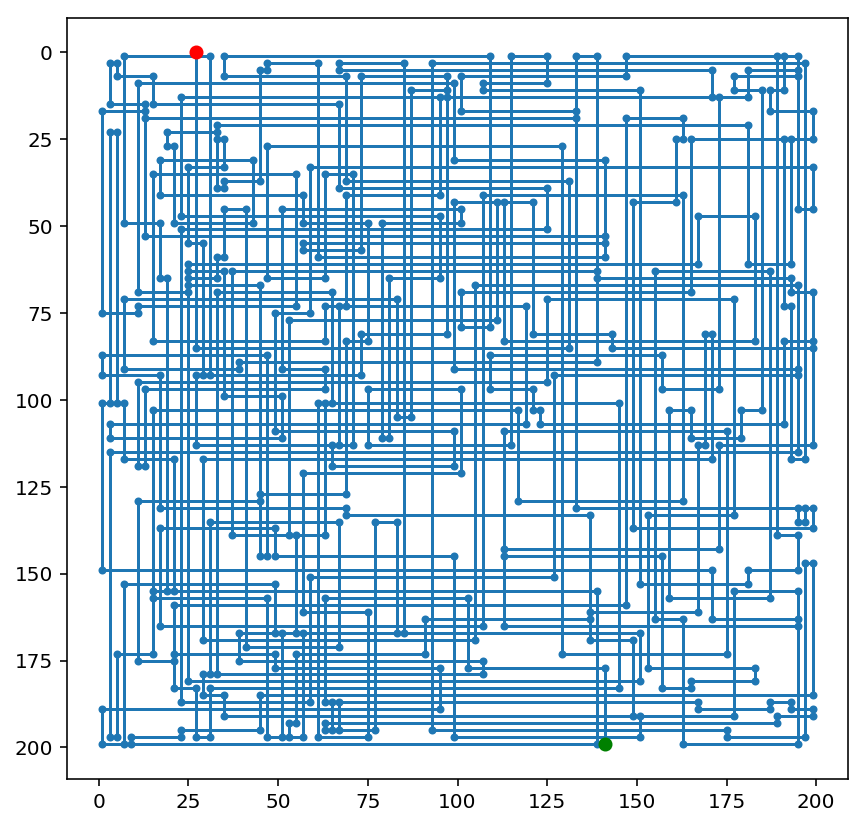

In [291]:
fig, ax = plt.subplots(figsize=(7, 7))
r, c = zip(*cursors)
ax.plot(c, r, '.-')
ax.plot(c[0], r[0], 'ro')
ax.plot(c[-1], r[-1], 'go')
ax.invert_yaxis()

# Day 20: Particle Swarm

In [387]:
!head -n5 data/day20-input.txt

p=<-1027,-979,-188>, v=<7,60,66>, a=<9,1,-7>
p=<-1846,-1539,-1147>, v=<88,145,67>, a=<6,-5,2>
p=<338,820,1541>, v=<-23,-16,-80>, a=<0,-6,-4>
p=<-3162,-1301,225>, v=<92,-52,59>, a=<18,19,-10>
p=<1780,554,-1980>, v=<-126,63,74>, a=<0,-14,9>


In [388]:
import re
particles = []
vector_regex = re.compile(r'<(?P<x>[0-9-]+),(?P<y>[0-9-]+),(?P<z>[0-9-]+)>')

with open('data/day20-input.txt') as f:
    for line in f:
        p, v, a = (
            tuple(map(int, match.group('x', 'y', 'z')))
            for match in vector_regex.finditer(line)
        )
        particles.append((p, v, a))
        
particles[-5:]

[((1078, -2011, 2018), (158, -286, 289), (-8, 19, -20)),
 ((-313, 1075, -2598), (-44, 158, -369), (2, -10, 25)),
 ((-2104, -2241, 768), (-307, -321, 106), (17, 24, -12)),
 ((378, 2768, 1004), (51, 395, 147), (-3, -26, -15)),
 ((-2667, -1543, 1410), (-382, -221, 200), (29, 16, -16))]

In [389]:
min(
    enumerate(particles), 
    key=lambda x: abs(x[1][2][0]) + abs(x[1][2][1]) + abs(x[1][2][2])
)

(119, ((-2116, 49, 1665), (72, -2, -80), (1, 0, 1)))

## Part 2

In [390]:
import collections
import functools

for t in range(100):
    # Remove collisions
    position_map = collections.defaultdict(set)
    for i, (p, v, a) in enumerate(particles):
        position_map[p].add(i)
    collided = sorted(sum((list(indices) for indices in position_map.values() if len(indices) > 1), []), reverse=True)
    # print(collided)
    for i in collided:
        del particles[i]
    
    # Update particles
    for i, (p, v, a) in enumerate(particles):
        v = (v[0] + a[0], v[1] + a[1], v[2] + a[2])
        p = (p[0] + v[0], p[1] + v[1], p[2] + v[2])
        particles[i] = (p, v, a)

print(len(particles))

471


# Day 21: Fractal Art

In [1]:
!head -n5 data/day21-input.txt

../.. => .#./.../###
#./.. => .#./##./#..
##/.. => #.#/#../###
.#/#. => ##./..#/###
##/#. => .#./#../..#


In [2]:
from IPython.display import display

        
class ArtImage(object):
    """Art image: 2 dimensional tuple of '.' and '#'."""
    
    def __init__(self, image):
        # Support single string input
        if isinstance(image, str):
            image = image.split('/')
        # _img is tuple of strings
        self._img = tuple(
            str(row) for row in image
        )
        self._size = len(self._img)
        assert all(len(row) == self._size for row in self._img), repr(self._img)
        
    @property
    def size(self):
        return self._size
        
    def __repr__(self):
        return "/".join(self._img)

    def __str__(self):
        return "\n".join(self._img)
    
    def _repr_html_(self):
        return "<pre style='display: inline-block; border: 1px solid #555; line-height:0.8;'>" + str(self) + "</pre>"
    
    def rotate_and_flip(self):
        """Generate variations of given image by rotation and flipping."""
        img = self._img
        for rotation in range(4):
            yield ArtImage(img)
            # flip
            yield ArtImage(img[::-1])
            # rotate
            img = tuple(''.join(row) for row in zip(*img))[::-1]
    
    def split(self):
        """Split in blocks of 2x2 or 3x3."""
        if self._size % 2 == 0:
            b = 2
        elif self._size % 3 == 0:
            b = 3
        else:
            raise ValueError(self._size)
            
        return [
            [
                ArtImage(self._img[r][c0:c0 + b] for r in range(r0, r0 + b))
                for c0 in range(0, self._size, b)
            ]
            for r0 in range(0, self._size, b)
        ]

    @classmethod
    def concat(cls, blocks):
        """Join given blocks together"""
        def rows():
            for block_row in blocks:
                assert all(isinstance(block, cls) for block in block_row)
                assert len(set(block._size for block in block_row)) == 1
                for r in range(block_row[0]._size):
                    yield ''.join(block._img[r] for block in block_row)
                
        return cls(rows())
    
    def transform(self, rules):
        # Split in blocks and transform each block and concat back together
        return ArtImage.concat(
            [rules[repr(block)] for block in row]
            for row in self.split()
        )

In [3]:
def parse_rules(lines):
    rules = {}
    for line in lines:
        pat, out = (ArtImage(x.strip()) for x in line.split('=>'))
        rules[repr(pat)] = out
        # Also store variations from rotation and flipping if not covered yet.
        for pat in pat.rotate_and_flip():
            if pat not in rules:
                rules[repr(pat)] = out
    return rules


In [4]:
start_image = ArtImage([
    '.#.', 
    '..#',
    '###',
])
start_image

.#./..#/###

In [5]:
test_rules = parse_rules([
    '../.# => ##./#../...',
    '.#./..#/### => #..#/..../..../#..#'
])
display(test_rules)


img0 = start_image
display(img0)
img1 = img0.transform(test_rules)
display(img1)
img2 = img1.transform(test_rules)
display(img2)

{'###/#../.#.': #..#/..../..../#..#,
 '###/..#/.#.': #..#/..../..../#..#,
 '##./#.#/#..': #..#/..../..../#..#,
 '#../#.#/##.': #..#/..../..../#..#,
 '#./..': ##./#../...,
 '.##/#.#/..#': #..#/..../..../#..#,
 '.#./#../###': #..#/..../..../#..#,
 '.#./..#/###': #..#/..../..../#..#,
 '.#/..': ##./#../...,
 '..#/#.#/.##': #..#/..../..../#..#,
 '../#.': ##./#../...,
 '../.#': ##./#../...}

.#./..#/###

#..#/..../..../#..#

##.##./#..#../....../##.##./#..#../......

In [6]:
with open('data/day21-input.txt') as f:
    rules = parse_rules(f)
    
img = start_image
for i in range(5):
    img = img.transform(rules)
    display(img)

str(img).count('#')

###./..#./.##./##..

#.##.#/#..#../######/.#..#./#..##./..##..

#.#.#..#./#..#..##./###..##../.#.#.#.#./#..#..#../..####..#/.#..#..#./##.#..##./#....##..

.##..####.../.#..#...##../#.###...#.##/.##.#.##...#/.###.##..###/#....#..#.../#...#.###.../#.##.##.#.##/#....####.../##..#...##../#.###...#.##/...##.##...#

#.#.#.##.#.#.#..#./#..##...##..#...../####..######..####/##..#.#.##.#.#..#./..##..#..#..##.#../###..########....#/##.#.##.#.#.##.#.#/..##..#..##...##../##########..######/#.##.###..#.#.##.#/#..#....##..#..#../#########..#######/.#..#.##.#.#.#..#./#.......##..#...../..##########..####/.#..#.#.##.#.#..#./##.#..#..#..##.#../#....########....#

176

## Part 2

In [14]:
_count_cache = {}
def img_on_pixel_count(img, rules, iterations=0):
    """Count 'on' pixels in image after given number of transformation iterations"""
    size = img.size
    if (repr(img), iterations) not in _count_cache:
        if iterations <= 0:
            count = str(img).count('#')
        elif size % 3  == 0 and size % 2 != 0:
            # Fight image growth with split
            count = sum(
                img_on_pixel_count(i.transform(rules), rules, iterations - 1)
                for row in img.split()
                for i in row
            )
        else:
            count = img_on_pixel_count(img.transform(rules), rules, iterations=iterations-1)
        _count_cache[repr(img), iterations] = count
    return _count_cache[repr(img), iterations]

In [15]:
with open('data/day21-input.txt') as f:
    rules = parse_rules(f)
    
img_on_pixel_count(start_image, rules, iterations=5)

176

In [16]:
img_on_pixel_count(start_image, rules, iterations=18)

2368161

# Day 22: Sporifica Virus

In [60]:
!head -n5 data/day22-input.txt

#.###...#..#..#...##.####
##.##.#..##.#..#.#..#####
.####..###.#.#####.#.##.#
##..#.##.#.#.#...#..##..#
..#...####.#.###.###...#.


In [61]:
def get_grid():
    with open('data/day22-input.txt') as f:
        grid = {}
        for r, row in enumerate(f):
            for c, status in enumerate(row.strip()):
                grid[r,c] = status
    cursor = (max(r for (r, c) in grid.keys()) // 2, max(c for (r, c) in grid.keys()) // 2)
    facing = (-1, 0)
    return grid, cursor, facing

In [62]:
def show_grid(grid):
    rmin = min(r for (r, c) in grid.keys())
    rmax = max(r for (r, c) in grid.keys())
    cmin = min(c for (r, c) in grid.keys())
    cmax = max(c for (r, c) in grid.keys())
    for r in range(rmin, rmax + 1):
        print(''.join(grid.get((r, c), '.') for c in range(cmin, cmax + 1)))

In [66]:
def process_grid(grid, cursor, facing, iterations = 10):
    cleans = 0
    infections = 0
    for i in range(iterations):
        if grid.get(cursor) == '#':
            # Infected: clean and turn right
            cleans += 1
            grid[cursor] = '.'
            facing = (facing[1], -facing[0])
        else:
            # Not infected: infect it and turn left
            infections += 1
            grid[cursor] = '#'
            facing = (-facing[1], facing[0])
        # move
        cursor = (cursor[0] + facing[0], cursor[1] + facing[1])
    return grid, cursor, facing, cleans, infections

In [67]:
# test grid
grid = {(1,0): '#', (0,2): '#'}
cursor = (1, 1)
facing = (-1, 0)
print('start')
show_grid(grid)
grid, cursor, facing, cleans, infections = process_grid(grid, cursor, facing, iterations=70)
print('end')
show_grid(grid)
print(cursor, facing, cleans, infections)

start
..#
#..
end
...##..
..#..#.
.#....#
#.#...#
#.#..#.
...##..
(0, 2) (-1, 0) 29 41


In [68]:
# Real grid
grid, cursor, facing = get_grid()

grid, cursor, facing, clean, infections = process_grid(grid, cursor, facing, iterations=10000)

print(len(grid), cursor, facing, clean, infections)

2332 (-142, 140) (-1, 0) 4538 5462


## Part 2

In [71]:
def process_grid(grid, cursor, facing, iterations = 10):
    actions = {'infect': 0, 'flag': 0, 'weaken': 0, 'clean': 0}
    for i in range(iterations):
        state = grid.get(cursor)
        if state == '#':
            actions['flag'] += 1
            grid[cursor] = 'F'
            # Turn right
            facing = (facing[1], -facing[0])
        elif state == 'F':
            actions['clean'] += 1
            grid[cursor] = '.'
            # Reverse
            facing = (-facing[0], -facing[1])
        elif state == 'W':
            actions['infect'] += 1
            grid[cursor] = '#'
        else:
            actions['weaken'] += 1
            grid[cursor] = 'W'
            # Turn left
            facing = (-facing[1], facing[0])
        # move
        cursor = (cursor[0] + facing[0], cursor[1] + facing[1])
    return grid, cursor, facing, actions

In [73]:
%%time 

# Real grid
grid, cursor, facing = get_grid()

grid, cursor, facing, actions = process_grid(grid, cursor, facing, iterations=10000000)

print(len(grid), cursor, facing, actions)

100817 (-48, 184) (0, 1) {'infect': 2512135, 'flag': 2487341, 'weaken': 2538160, 'clean': 2462364}
CPU times: user 7.84 s, sys: 33.2 ms, total: 7.87 s
Wall time: 7.89 s


# Day 23: Coprocessor Conflagration

In [150]:
!head data/day23-input.txt

set b 84
set c b
jnz a 2
jnz 1 5
mul b 100
sub b -100000
set c b
sub c -17000
set f 1
set d 2


In [151]:
with open('data/day23-input.txt') as f:
    instructions = [line.split() for line in f]
# list(enumerate(instructions))

In [131]:
import collections

def run(instructions, cursor=0, registers={}, limit=None, verbose=False):
    cycles = 0
    op_counters = collections.defaultdict(int)
    
    def value(key):
        if 'a' <= key <= 'z':
            return int(registers.get(key, 0))
        else:
            return int(key)
    
    while 0 <= cursor < len(instructions) and (limit is None or cycles < limit):
        op, x, y = instructions[cursor]
        state = '{c:2d} {o} {x}({xv}) {y}({yv})'.format(c=cursor, o=op, x=x, xv=value(x), y=y, yv=value(y))
        op_counters[op] += 1
        if op == 'jnz':
            if value(x) != 0:
                cursor += value(y)
                if verbose:
                    print(state, ' --> ', 'jump', cursor)
                continue
        elif op == 'set':
            registers[x] = value(y)
        elif op == 'sub':
            registers[x] = value(x) - value(y)
        elif op == 'mul':
            registers[x] = value(x) * value(y)
        if verbose:
            print(state,  ' --> ', x, value(x))
        cursor += 1
        cycles += 1
            
            
    return registers, cycles, op_counters

In [152]:
run(instructions)

({'b': 84, 'c': 84, 'd': 84, 'e': 84, 'f': 0, 'g': 0, 'h': 2},
 40785,
 defaultdict(int, {'jnz': 13535, 'mul': 6724, 'set': 13627, 'sub': 20338}))

## Part 2

Manually decompiled instructions (for case `a=1`) to algorithm:

    h = 0
    b0 = 108400
    c = 125400
    for b in range(b0, c + 1, 17):
        f = 1
        for d in range(2, b):
            for e in range(2, e):
                if d * e == b:
                    f = 0
        if f == 0:
            h += 1
         
Which corresponds to counting the non-primes between 108400 and 125400 (inclusive) in a very inefficient way

In [155]:
import math
def not_prime(n):
    return n < 2 or any(n % x == 0 for x in range(2, int(math.sqrt(n)) + 1))

In [157]:
sum(not_prime(n) for n in range(108400, 125400 + 1, 17))

903